In [18]:
import pandas as pd

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
# Cargar los datos
k2_df_raw = pd.read_csv('../../data/raw/k2pandc_2025.10.04_12.42.17.csv')

In [21]:
# Mostrar las primeras filas del DataFrame
k2_df_raw.head()

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,41.688644,0.003353,-0.003419,0.0,NaN,NaN,NaN,NaN,2.355454,0.310000,-0.166773,0.0,0.210139,0.027656,-0.014878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,NaN,5703.00,50.00,-50.00,0.0,0.956122,0.098585,-0.054675,0.0,0.963861,0.029568,-0.032166,0.0,-0.06,0.080,-0.080,0.0,[Fe/H],4.38000,0.100000,-0.100000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2018-03,15/02/2018
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,41.685500,0.003000,-0.003100,0.0,0.241,0.019,-0.017,0.0,2.230000,0.140000,-0.110000,0.0,0.198947,0.012490,-0.009814,0.0,16.3000,6.0000,-6.1000,0.0,0.051285,0.018878,-0.019193,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,546.0,19.0,-18.0,0.0,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,G,5766.00,99.00,-99.00,0.0,0.928000,0.055000,-0.040000,0.0,0.961000,0.032000,-0.029000,0.0,-0.15,0.050,-0.050,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2016-10,28/07/2016
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,0.003000,-0.003000,0.0,NaN,NaN,NaN,NaN,2.578070,0.112090,-0.112090,0.0,0.230000,0.010000,-0.010000,0.0,22.2481,9.5349,-9.5349,0.0,0.070000,0.030000,-0.030000,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,5766.00,99.00,-99.00,0.0,1.080000,0.060000,-0.060000,0.0,1.670000,0.400000,-0.400000,0.0,-0.15,NaN,NaN,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2017-03,26/04/2018
3,EPIC 201111557.01,EPIC 201111557,1,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,Published Candidate,0,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,2.301830,0.000280,-0.000300,0.0,NaN,NaN,NaN,NaN,1.120000,0.110000,-0.080000,0.0,0.099900,0.009800,-0.007000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.0,55.0,-55.0,0.0,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,4616.52,82.36,-115.56,0.0,0.762602,0.053651,-0.037585,0.0,0.730000,0.084105,-0.081044,0.0,-0.03,0.034,-0.034,0.0,[M/H],4.53679,0.075486,-0.090593,0.0,<a refstr=S

In [22]:
k2_df_raw.shape

(4004, 94)

In [23]:
#Mostrar información del DataFrame
k2_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4004 non-null   object 
 1   hostname         4004 non-null   object 
 2   default_flag     4004 non-null   int64  
 3   disposition      4004 non-null   object 
 4   disp_refname     4004 non-null   object 
 5   sy_snum          4004 non-null   int64  
 6   sy_pnum          4004 non-null   int64  
 7   discoverymethod  4004 non-null   object 
 8   disc_year        4004 non-null   int64  
 9   disc_facility    4004 non-null   object 
 10  soltype          4004 non-null   object 
 11  pl_controv_flag  4004 non-null   int64  
 12  pl_refname       4004 non-null   object 
 13  pl_orbper        3960 non-null   float64
 14  pl_orbpererr1    3071 non-null   float64
 15  pl_orbpererr2    3071 non-null   float64
 16  pl_orbperlim     3960 non-null   float64
 17  pl_orbsmax    

In [24]:
# Definir el target
target = 'disposition'

# Eliminar columnas con más del 50% de valores nulos
umbral_nulos = 0.5
limite_col = int(k2_df_raw.shape[0] * umbral_nulos)
k2_df_clean = k2_df_raw.loc[:, k2_df_raw.isnull().sum() <= limite_col]

# Eliminar filas donde el target esté nulo
k2_df_clean = k2_df_clean[k2_df_clean[target].notnull()]

# Opcional: eliminar filas con nulos en otras columnas (puedes ajustar el umbral)
k2_df_clean = k2_df_clean.dropna()

k2_df_clean.shape

(1224, 61)

In [25]:
k2_df_clean.isnull().sum()    

pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [26]:
k2_df_clean.shape

(1224, 61)

In [27]:
k2_df_clean.isnull().sum()

pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [28]:
k2_df_clean.shape

(1224, 61)

In [29]:
k2_df_clean.isnull().sum()



pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [30]:
# Remove columns that are completely empty (all values are NaN)
k2_df_clean = k2_df_clean.dropna(axis=1, how='all')

# Remove rows that are completely empty (all values are NaN)
k2_df_clean = k2_df_clean.dropna(axis=0, how='all')

k2_df_clean.shape

(1224, 61)

In [31]:
k2_df_clean.shape

(1224, 61)

In [32]:
k2_df_clean = k2_df_clean.loc[:, k2_df_clean.nunique() > 1]
k2_df_clean.head()

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,ttv_flag,st_refname,st_teff,st_tefferr1,st_tefferr2,st_rad,st_raderr1,st_raderr2,st_mass,st_logg,st_loggerr1,st_loggerr2,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,41.688644,0.003353,-0.003419,2.355454,0.31000,-0.166773,0.0,0.210139,0.027656,-0.014878,0.0,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,5703.00,50.00,-50.00,0.956122,0.098585,-0.054675,0.963861,4.38000,0.100000,-0.100000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2018-03,15/02/2018
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,41.685500,0.003000,-0.003100,2.230000,0.14000,-0.110000,0.0,0.198947,0.012490,-0.009814,0.0,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,5766.00,99.00,-99.00,0.928000,0.055000,-0.040000,0.961000,4.50000,0.080000,-0.080000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2016-10,28/07/2016
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,0.003000,-0.003000,2.578070,0.11209,-0.112090,0.0,0.230000,0.010000,-0.010000,0.0,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,5766.00,99.00,-99.00,1.080000,0.060000,-0.060000,1.670000,4.50000,0.080000,-0.080000,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,25/04/2018,2017-03,26/04/2018
3,EPIC 201111557.01,EPIC 201111557,1,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,Published Candidate,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,2.301830,0.000280,-0.000300,1.120000,0.11000,-0.080000,0.0,0.099900,0.009800,-0.007000,0.0,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,4616.52,82.36,-115.56,0.762602,0.053651,-0.037585,0.730000,4.53679,0.075486,-0.090593,12h15m23.10s,183.846245,-06d16m05.98s,-6.268329,97.1795,0.4642,-0.4598,11.727,0.046,-0.046,9.220,0.019,-0.019,11.3995,0.001307,-0.001307,02/08/2018,2018-08,02/08/2018
7,EPIC 201127519.01,EPIC 201127519,1,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,Published Candidate,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,6.178870,0.000070,-0.000070,8.840000,0.14000,-0.130000,0.0,0.789000,0.012000,-0.012000,0.0,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,4719.28,100.72,-112.19,0.849432,0.053904,-0.052076,0.756000,4.45833,0.062492,-0.110798,12h05m29.23s,181.371809,-05d50m53.79s,-5.848274,117.7040,0.7780,-0.7670,11.733,0.046,-0.046,9.430,0.021,-0.021,11.4806,0.000478,-0.000478,02/08/2018,2018-08,02/08/2018


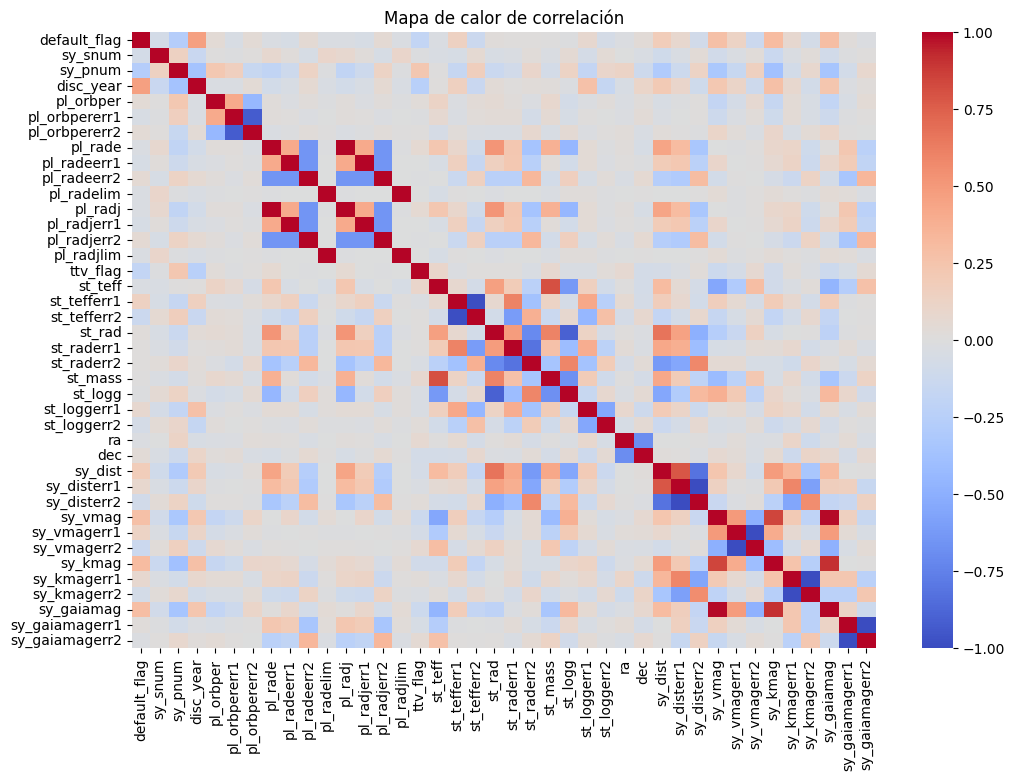

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = k2_df_clean.corr(numeric_only=True)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()